In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('train.csv')
data
data = data[np.abs(data["count"]-data["count"].mean())<=(3*data["count"].std())]

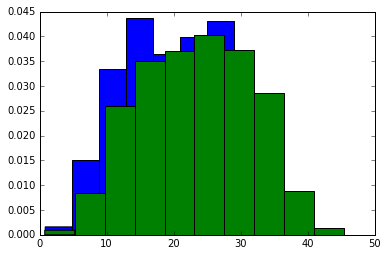

In [54]:
_ = plt.hist(data["temp"],bins=10,normed=True)
_ = plt.hist(data["atemp"],bins=10,normed=True)
_ = plt.show()

In [55]:
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
data['day_of_week']=pd.DatetimeIndex(data['datetime']).dayofweek
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,5


In [56]:
model_data = data[data.columns[[1,2,3,4,5,6,7,8,12,13,14]]]
target_data = np.log1p(data["count"])
model_data,target_data

(       season  holiday  workingday  weather   temp   atemp  humidity  \
 0           1        0           0        1   9.84  14.395        81   
 1           1        0           0        1   9.02  13.635        80   
 2           1        0           0        1   9.02  13.635        80   
 3           1        0           0        1   9.84  14.395        75   
 4           1        0           0        1   9.84  14.395        75   
 5           1        0           0        2   9.84  12.880        75   
 6           1        0           0        1   9.02  13.635        80   
 7           1        0           0        1   8.20  12.880        86   
 8           1        0           0        1   9.84  14.395        75   
 9           1        0           0        1  13.12  17.425        76   
 10          1        0           0        1  15.58  19.695        76   
 11          1        0           0        1  14.76  16.665        81   
 12          1        0           0        1  17.22

In [64]:
from sklearn.preprocessing import normalize
model_data=normalize(model_data,norm='l2', axis=1, copy=True, return_norm=False)
model_data.shape

(10739, 11)

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from gplearn.genetic import SymbolicRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(model_data,target_data,test_size=0.01)
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal',activation='linear'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [74]:
model = LinearRegression()
model_forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
model_adaboost = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
# estimators.append(('standardize', StandardScaler()))
model_nn = Sequential()
model_nn.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
model_nn.add(Dense(5, kernel_initializer='normal', activation='relu'))
model_nn.add(Dense(1, kernel_initializer='normal',activation='linear'))
# Compile model
model_nn.compile(loss='mean_squared_error', optimizer='adam')
model_nn.fit(X_train,Y_train,epochs=100,batch_size=10)
# model_gen = SymbolicRegressor(population_size=5000,
#                            generations=30, stopping_criteria=0.01,
#                            p_crossover=0.7, p_subtree_mutation=0.1,
#                            p_hoist_mutation=0.05, p_point_mutation=0.1,
#                            max_samples=0.9, verbose=1,
#                            parsimony_coefficient=0.01, random_state=0)
model.fit(X_train,Y_train)
model_forest.fit(X_train,Y_train)
model_adaboost.fit(X_train,Y_train)
# model_gen.fit(X_train,Y_train)
print(model,model_forest)

Epoch 1/100
10631/10631 [==============================] - 1s - loss: 5.4582     
Epoch 2/100
10631/10631 [==============================] - 1s - loss: 1.9591     
Epoch 3/100
10631/10631 [==============================] - 1s - loss: 1.9352     
Epoch 4/100
10631/10631 [==============================] - 1s - loss: 1.9110     
Epoch 5/100
10631/10631 [==============================] - 1s - loss: 1.8849     
Epoch 6/100
10631/10631 [==============================] - 1s - loss: 1.8564     
Epoch 7/100
10631/10631 [==============================] - 1s - loss: 1.8266     
Epoch 8/100
10631/10631 [==============================] - 1s - loss: 1.7942     
Epoch 9/100
10631/10631 [==============================] - 1s - loss: 1.7546     
Epoch 10/100
10631/10631 [==============================] - 1s - loss: 1.7147     
Epoch 11/100
10631/10631 [==============================] - 1s - loss: 1.6708     
Epoch 12/100
10631/10631 [==============================] - 1s - loss: 1.6262     
Epoch 13/100


10631/10631 [==============================] - 1s - loss: 1.4858     
Epoch 100/100
10631/10631 [==============================] - 1s - loss: 1.4865     
(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))


In [90]:
Y_pred=model.predict(X_test)

Y_pred_forest = model_forest.predict(X_test)
Y_pred_nn = model_nn.predict(X_test)
Y_pred_adaboost = model_adaboost.predict(X_test)
Y_pred_nn.reshape((108,))
Y_ensemble = (Y_pred+Y_pred_forest+Y_pred_adaboost+Y_pred_nn)/4
Y_pred_nn.shape

(108, 1)

In [79]:
print(mean_squared_error(Y_test,Y_pred),mean_squared_error(Y_test,Y_pred_forest),mean_squared_error(Y_test,Y_ensemble),mean_squared_error(Y_test,Y_pred_adaboost),mean_squared_error(Y_test,Y_pred_nn))

ValueError: y_true and y_pred have different number of output (1!=108)

In [32]:
Y_pred,Y_test

(array([ 5.59985422,  5.1519748 ,  4.12387589,  4.21379076,  3.89771516,
         5.03489742,  4.35462223,  5.29199531,  4.33514099,  4.34764368,
         5.08028683,  5.42851487,  4.74396039,  4.11499027,  3.57136153,
         3.99513838,  4.79721848,  4.24980648,  4.88037799,  3.79974404,
         4.15546157,  5.65307426,  4.68291014,  5.14165266,  4.90577531,
         4.87043858,  4.51539273,  4.02721061,  3.91101642,  4.31915083,
         4.04627343,  3.62923595,  5.60300383,  3.90602332,  5.14280561,
         4.83802579,  3.26894507,  5.33363074,  4.6889766 ,  5.5514166 ,
         5.07289226,  5.05361988,  5.25462247,  5.71625886,  5.34951643,
         5.56444083,  4.64049049,  4.57563808,  5.14355055,  4.81043932,
         3.0761072 ,  4.73734799,  4.86969753,  5.00040817,  5.761925  ,
         3.95578286,  4.09617531,  4.6743263 ,  3.83426757,  5.79797867,
         5.17006155,  4.06584664,  4.97944985,  4.08463997,  3.78867277,
         5.10560038,  5.42738549,  4.90390157,  5.8

In [ ]:
Y_test

In [ ]:
def feature_engineering(data):
    data["ratio_rh_temp"] = data["humidity"]/data["temp"]
    data["ratio_rh_atemp"] = data["humidity"]/data["atemp"]
    data["ratio_diff"] = data["ratio_rh_temp"]-data["ratio_rh_atemp"]
    data["ratio_register"]= data["casual"]/data["registered"]
    data["ratio_register"][~np.isfinite(data["ratio_register"])] = np.nan
    data["ratio_register"].fillna(np.mean(data["ratio_register"]),inplace=True)
    data["ratio_rh_temp"][~np.isfinite(data["ratio_rh_temp"])] = np.nan
    data["ratio_rh_temp"].fillna(np.mean(data["ratio_rh_temp"]),inplace=True)
    data["ratio_rh_atemp"][~np.isfinite(data["ratio_rh_atemp"])] = np.nan
    data["ratio_rh_atemp"].fillna(np.mean(data["ratio_rh_atemp"]),inplace=True)
    


In [ ]:
test_data = pd.read_csv('test.csv')
test_data

In [159]:
test_data_model = feature_engineering(test_data)

KeyError: 'casual'